In [1]:
import pandas as pd

In [7]:
# Carico il dataset
data = pd.read_csv("amazon_prime_titles.csv")

# Stampo le info di base inerenti al dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [8]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
data.info

<bound method DataFrame.info of      show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh

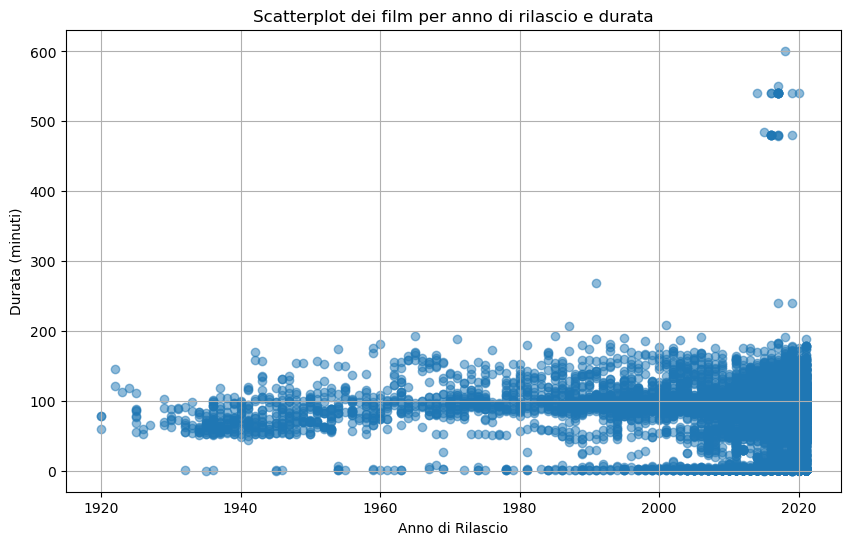

In [10]:
# Estraggo la durata in minuti
data['duration_minutes'] = data['duration'].str.extract('(\d+)').astype(float)

# Creo lo scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['release_year'], data['duration_minutes'], alpha=0.5)
plt.title('Scatterplot dei film per anno di rilascio e durata')
plt.xlabel('Anno di Rilascio')
plt.ylabel('Durata (minuti)')
plt.grid(True)
plt.show()

In [13]:
# Calcolo la correlazione tra l'anno di rilascio e la durata
correlation = data[['release_year', 'duration_minutes']].corr()

correlation

,release_year,duration_minutes
release_year,1.000000,-0.121605
duration_minutes,-0.121605,1.000000


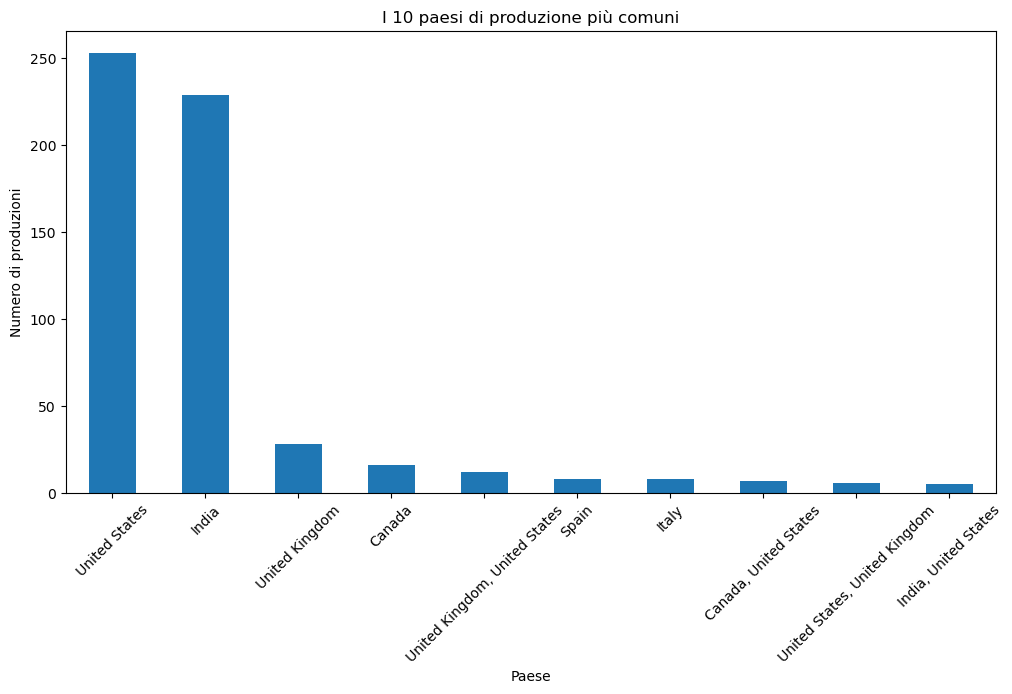

In [14]:
# Creo un istogramma con i paesi di produzione più comuni
country_counts = data['country'].value_counts().head(10)  # Prendo i primi 10 paesi più comuni

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('I 10 paesi di produzione più comuni')
plt.xlabel('Paese')
plt.ylabel('Numero di produzioni')
plt.xticks(rotation=45)
plt.show()

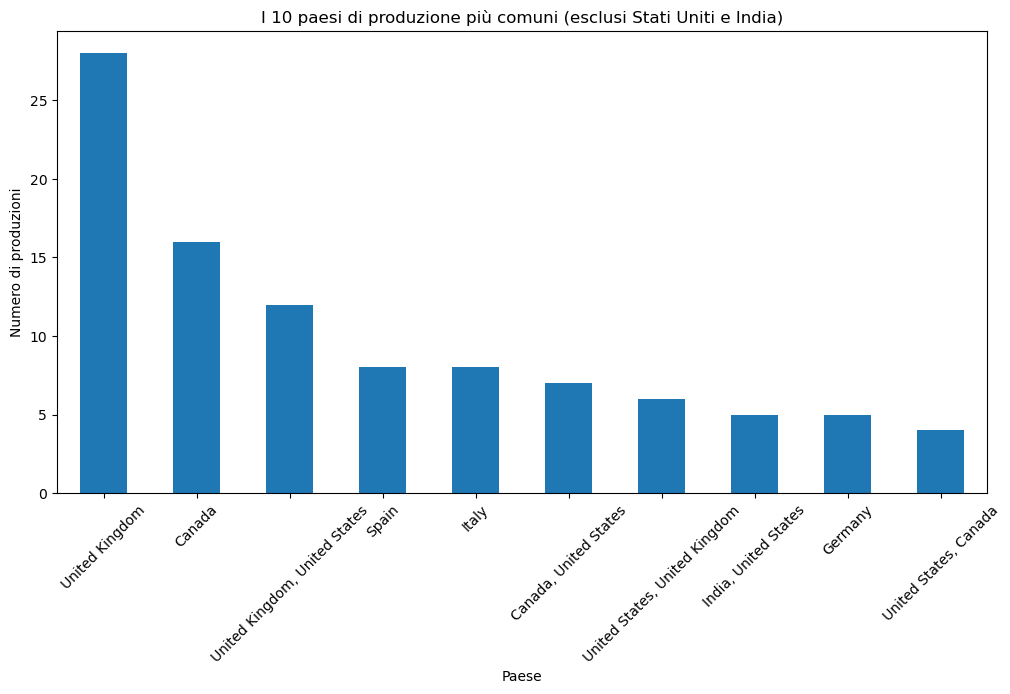

In [15]:
# Filtro i dati per escludere Stati Uniti e India
filtered_country_counts = data[~data['country'].isin(['United States', 'India'])]['country'].value_counts().head(10)

# Creo un istogramma con i paesi di produzione più comuni (esclusi Stati Uniti e India)
plt.figure(figsize=(12, 6))
filtered_country_counts.plot(kind='bar')
plt.title('I 10 paesi di produzione più comuni (esclusi Stati Uniti e India)')
plt.xlabel('Paese')
plt.ylabel('Numero di produzioni')
plt.xticks(rotation=45)
plt.show()

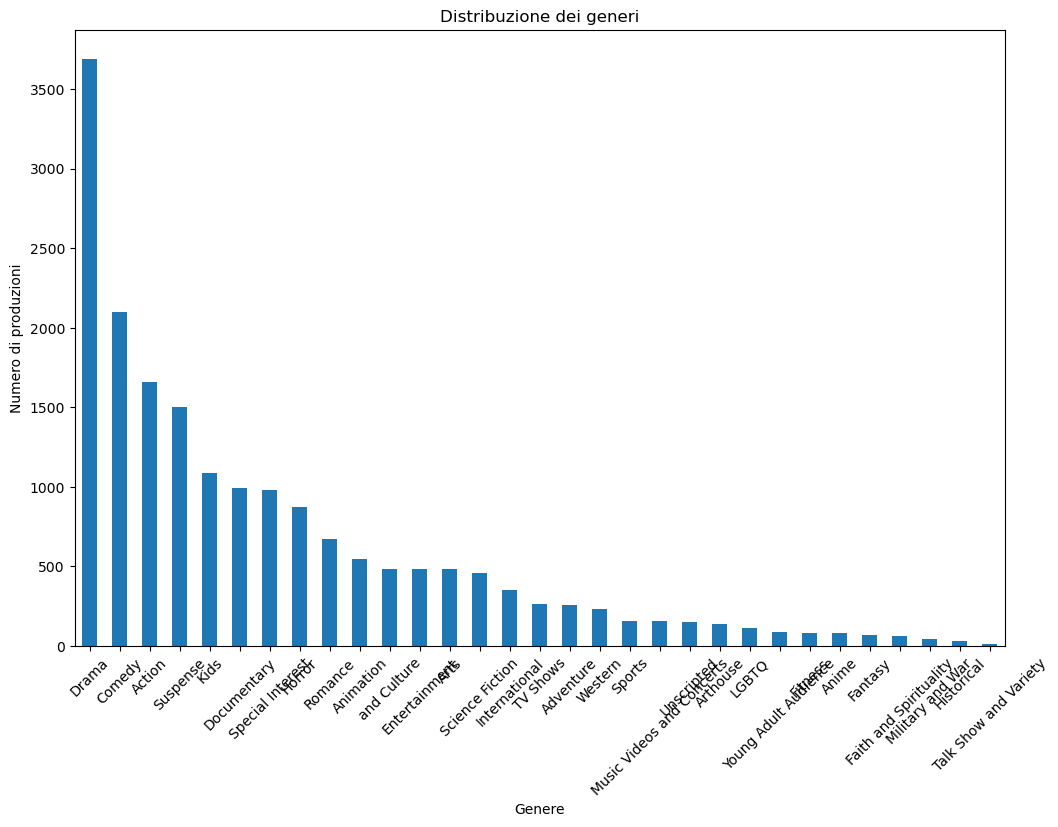

In [16]:
# Separo i generi in una lista per ogni titolo
data['genres'] = data['listed_in'].str.split(', ')

# Metto la lista in righe separate
genres_exploded = data.explode('genres')

# Calcolo la frequenza di ogni genere
genre_counts = genres_exploded['genres'].value_counts()

# Creo un istogramma con la distribuzione dei generi
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Distribuzione dei generi')
plt.xlabel('Genere')
plt.ylabel('Numero di produzioni')
plt.xticks(rotation=45)
plt.show()


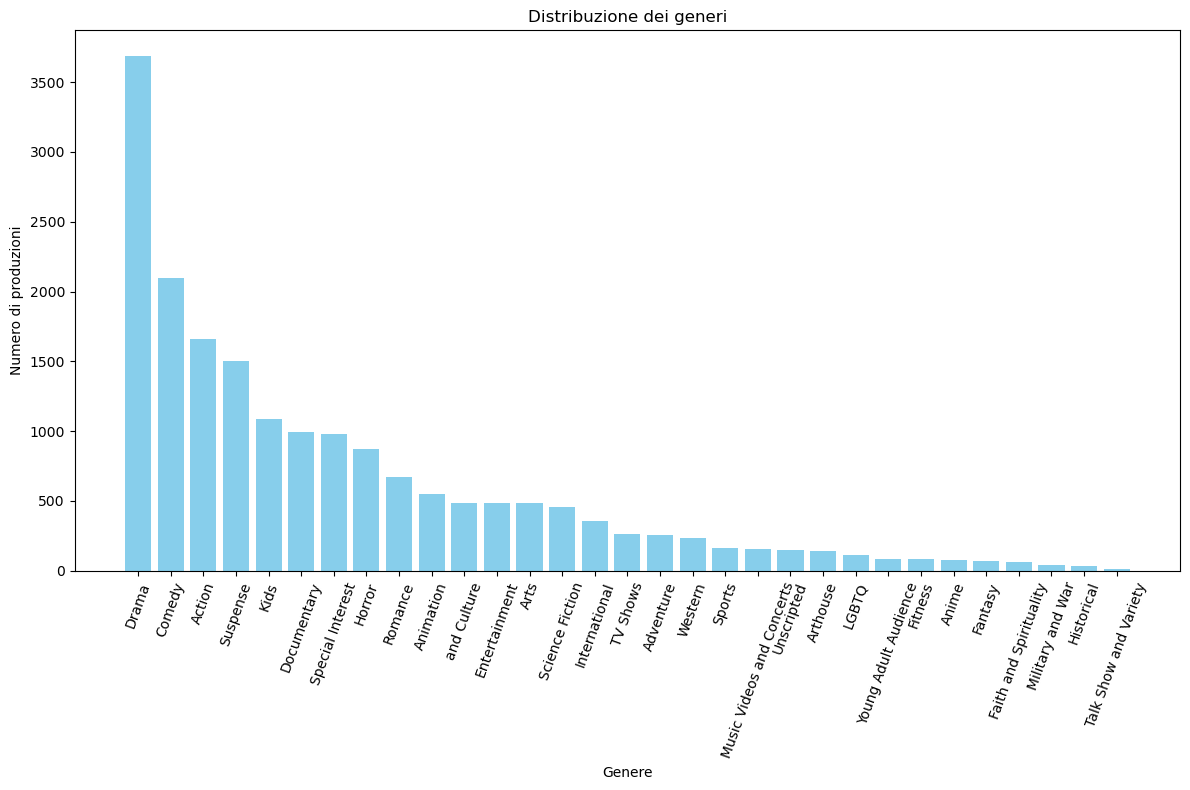

In [20]:
import seaborn as sns

# Creo un istogramma con la distribuzione dei generi usando Matplotlib con etichette migliorate
plt.figure(figsize=(12, 8))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.title('Distribuzione dei generi')
plt.xlabel('Genere')
plt.ylabel('Numero di produzioni')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
